In [0]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


https://machinelearningmastery.com/imbalanced-classification-model-to-detect-microcalcifications/

In [0]:
#path = '/content/drive/My Drive/DeepLearning/'
import pandas as pd
# define the dataset location
filename = '/content/drive/My Drive/imbalance-classification/mammography.csv'
# load the csv file as a data frame
dataframe = pd.read_csv(filename, header=None)

In [0]:
# summarize the shape of the dataset
print(dataframe.shape)

(11183, 7)


In [0]:
from collections import Counter
# summarize the class distribution
target = dataframe.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class='-1', Count=10923, Percentage=97.675%
Class='1', Count=260, Percentage=2.325%


In [0]:
# load and summarize the dataset
from pandas import read_csv
from collections import Counter
# define the dataset location
filename = '/content/drive/My Drive/imbalance-classification/mammography.csv'
# load the csv file as a data frame
dataframe = read_csv(filename, header=None)
# summarize the shape of the dataset
print(dataframe.shape)
# summarize the class distribution
target = dataframe.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

(11183, 7)
Class='-1', Count=10923, Percentage=97.675%
Class='1', Count=260, Percentage=2.325%


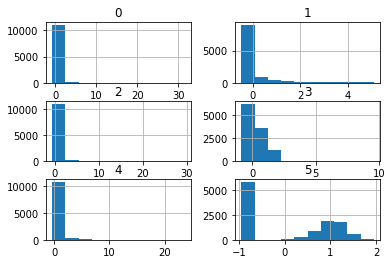

In [0]:
# create histograms of numeric input variables
from pandas import read_csv
from matplotlib import pyplot
# define the dataset location
filename = '/content/drive/My Drive/imbalance-classification/mammography.csv'
# load the csv file as a data frame
df = read_csv(filename, header=None)
# histograms of all variables
df.hist()
pyplot.show()

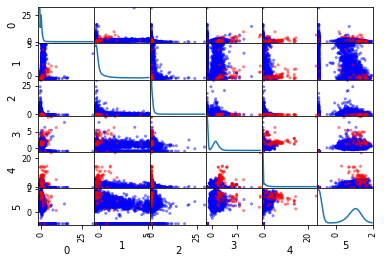

In [0]:
# create pairwise scatter plots of numeric input variables
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
# define the dataset location
filename = '/content/drive/My Drive/imbalance-classification/mammography.csv'
# load the csv file as a data frame
df = read_csv(filename, header=None)
# define a mapping of class values to colors
color_dict = {"'-1'":'blue', "'1'":'red'}
# map each row to a color based on the class value
colors = [color_dict[str(x)] for x in df.values[:, -1]]
# pairwise scatter plots of all numerical variables
scatter_matrix(df, diagonal='kde', color=colors)
pyplot.show()

In [0]:
# load the dataset
def load_dataset(full_path):
	# load the dataset as a numpy array
	data = read_csv(full_path, header=None)
	# retrieve numpy array
	data = data.values
	# split into input and output elements
	X, y = data[:, :-1], data[:, -1]
	# label encode the target variable to have the classes 0 and 1
	y = LabelEncoder().fit_transform(y)
	return X, y

In [0]:
# evaluate a model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
	return scores

In [0]:
from sklearn.dummy import DummyClassifier
# define the reference model
model = DummyClassifier(strategy='stratified')

In [0]:
# test harness and baseline model evaluation
from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier


# define the location of the dataset
full_path = '/content/drive/My Drive/imbalance-classification/mammography.csv'
# load the dataset
X, y = load_dataset(full_path)
# summarize the loaded dataset
print(X.shape, y.shape, Counter(y))
# define the reference model
model = DummyClassifier(strategy='stratified')
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean ROC AUC: %.3f (%.3f)' % (mean(scores), std(scores)))

(11183, 6) (11183,) Counter({0: 10923, 1: 260})
Mean ROC AUC: 0.500 (0.014)


In [0]:
# define models to test
def get_models():
	models, names = list(), list()
	# LR
	models.append(LogisticRegression(solver='lbfgs'))
	names.append('LR')
	# SVM
	models.append(SVC(gamma='scale'))
	names.append('SVM')
	# Bagging
	models.append(BaggingClassifier(n_estimators=1000))
	names.append('BAG')
	# RF
	models.append(RandomForestClassifier(n_estimators=1000))
	names.append('RF')
	# GBM
	models.append(GradientBoostingClassifier(n_estimators=1000))
	names.append('GBM')
	return models, names

>LR 0.922 (0.038)


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


>SVM 0.959 (0.018)
>RF 0.950 (0.028)


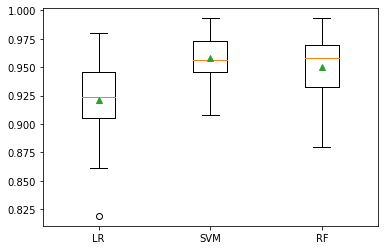

>RF 0.948 (0.029)


ValueError: ignored

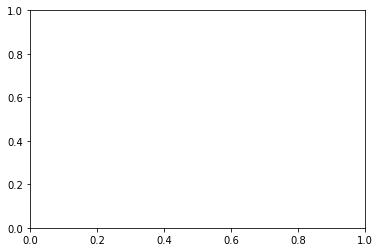

In [0]:
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# load the dataset
def load_dataset(full_path):
	# load the dataset as a numpy array
	data = read_csv(full_path, header=None)
	# retrieve numpy array
	data = data.values
	# split into input and output elements
	X, y = data[:, :-1], data[:, -1]
	# label encode the target variable to have the classes 0 and 1
	y = LabelEncoder().fit_transform(y)
	return X, y

# evaluate a model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
	return scores

# define models to test
def get_models():
	models, names = list(), list()
	# LR
	models.append(LogisticRegression(solver='lbfgs', class_weight='balanced'))
	names.append('LR')
	# SVM
	models.append(SVC(gamma='scale', class_weight='balanced'))
	names.append('SVM')
	# RF
	models.append(RandomForestClassifier(n_estimators=1000))
	names.append('RF')
	return models, names

# define the location of the dataset
full_path = '/content/drive/My Drive/imbalance-classification/mammography.csv'
# load the dataset
X, y = load_dataset(full_path)
# define models
models, names = get_models()
results = list()
# evaluate each model
for i in range(len(models)):
	# defines pipeline steps
	steps = [('p', PowerTransformer()), ('m',models[i])]
	# define pipeline
	pipeline = Pipeline(steps=steps)
	# evaluate the pipeline and store results
	scores = evaluate_model(X, y, pipeline)
	results.append(scores)
	# summarize and store
	print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()
scores = evaluate_model(X, y, models[i])
results.append(scores)
# summarize and store
print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [5]:
from sklearn.decomposition import PCA
import pandas as pd
x=[[3,3],[3,3],[3,3]] 
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_pca.py:456: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


In [6]:
principalDf

,principal component 1,principal component 2
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
